<a href="https://colab.research.google.com/github/armindocachada/working-with-pandas-series/blob/main/How_to_create_a_Panda_Data_Frame_from_an_HTML_Table.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas

In [ ]:
help(pandas.read_html)

Help on function read_html in module pandas.io.html:

read_html(io:Union[str, pathlib.Path, IO[~AnyStr]], match:Union[str, Pattern[~AnyStr]]='.+', flavor:Union[str, NoneType]=None, header:Union[int, Sequence[int], NoneType]=None, index_col:Union[int, Sequence[int], NoneType]=None, skiprows:Union[int, Sequence[int], slice, NoneType]=None, attrs:Union[Dict[str, str], NoneType]=None, parse_dates:bool=False, thousands:Union[str, NoneType]=',', encoding:Union[str, NoneType]=None, decimal:str='.', converters:Union[Dict, NoneType]=None, na_values=None, keep_default_na:bool=True, displayed_only:bool=True) -> List[pandas.core.frame.DataFrame]
    Read HTML tables into a ``list`` of ``DataFrame`` objects.
    
    Parameters
    ----------
    io : str, path object or file-like object
        A URL, a file-like object, or a raw string containing HTML. Note that
        lxml only accepts the http, ftp and file url protocols. If you have a
        URL that starts with ``'https'`` you might try rem

In [ ]:
tables = pandas.read_html("https://en.wikipedia.org/wiki/List_of_Nvidia_graphics_processing_units#GeForce_30_series")

In [ ]:
print(len(tables))

98


In [ ]:
tables = pandas.read_html("https://en.wikipedia.org/wiki/List_of_Nvidia_graphics_processing_units#GeForce_30_series", match="10496:328:112:328:82")
tables[0]

Model  ... Release price (USD)
                      Model  ...    Founders Edition
0     GeForce RTX 3060[150]  ...                $329
1  GeForce RTX 3060 Ti[151]  ...                $399
2     GeForce RTX 3070[152]  ...                $499
3     GeForce RTX 3080[155]  ...                $699
4     GeForce RTX 3090[156]  ...               $1499

[5 rows x 29 columns]

In [ ]:
tables[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 29 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   (Model, Model)                                                   5 non-null      object 
 1   (Launch, Launch)                                                 5 non-null      object 
 2   (Code name, Code name)                                           5 non-null      object 
 3   (Process, Process)                                               5 non-null      object 
 4   (Transistors (billion), Transistors (billion))                   5 non-null      float64
 5   (Die size (mm2), Die size (mm2))                                 5 non-null      float64
 6   (Core config[a], Core config[a])                                 5 non-null      object 
 7   (Bus interface, Bus interface)                  

In [ ]:
df = tables[0]
df.columns = df.columns.get_level_values(1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Model                               5 non-null      object 
 1   Launch                              5 non-null      object 
 2   Code name                           5 non-null      object 
 3   Process                             5 non-null      object 
 4   Transistors (billion)               5 non-null      float64
 5   Die size (mm2)                      5 non-null      float64
 6   Core config[a]                      5 non-null      object 
 7   Bus interface                       5 non-null      object 
 8   L2 Cache(MB)                        5 non-null      int64  
 9   Base core clock (MHz)               5 non-null      int64  
 10  Boost core clock (MHz)              5 non-null      int64  
 11  Memory (MT/s)                       5 non-null   

In [ ]:
df

,Model,Launch,Code name,Process,Transistors (billion),Die size (mm2),Core config[a],Bus interface,L2 Cache(MB),Base core clock (MHz),Boost core clock (MHz),Memory (MT/s),Size (GiB),Bandwidth (GB/s),Bus type,Bus width (bit),Pixel (GP/s),Texture (GT/s),Single precision,Double precision,Half precision,Tensor compute (FP16) (2:1 sparse),Rays/s (Billions),RTX OPS/s (Trillions),Ray Perf TFLOPS,TDP (Watts),NVLink support,MSRP,Founders Edition
0,GeForce RTX 3060[150],"February 25, 2021",GA106-300-A1,Samsung8N(10LP++++),13.25,300.0,3584:112:64:112:28(28) (?),PCIe 4.0 x16,3,1320,1777,15000,12,360.0,GDDR6,192,NaN,NaN,9.46 12.74,0.148 0.199,9.46 12.74,NaN,NaN,NaN,25,170,No,NaN,$329
1,GeForce RTX 3060 Ti[151],"December 2, 2020",GA104-200-A1,Samsung8N(10LP++++),17.40,392.5,4864:152:80:152:38(38) (6),PCIe 4.0 x16,4,1410,1665,14000,8,448.0,GDDR6,256,NaN,NaN,13.7 16.20,0.214 0.253,13.7 16.20,? 129.6,NaN,NaN,NaN,200,No,NaN,$399
2,GeForce RTX 3070[152],"October 29, 2020[153]",GA104-300-A1,Samsung8N(10LP++++),17.40,392.5,5888:184:96:184:46(46) (6),PCIe 4.0 x16,4,1500,1725,14000,8,448.0,GDDR6,256,96.0 110.72,276.0 318.32,17.66 20.37,0.276 0.318,17.66 20.37,141.31 162.98,NaN,NaN,40[154],220,No,NaN,$499
3,GeForce RTX 3080[155],"September 17, 2020",GA102-200-KD-A1,Samsung8N(10LP++++),28.30,628.4,8704:272:96:272:68(68) (7),PCIe 4.0 x16,5,1440,1710,19000,10,760.0,GDDR6X,320,126.72 150.48,391.68 465.12,25.06 29.76,0.392 0.465,25.06 29.76,200.54 238.14,NaN,NaN,58[154],320,No,NaN,$699
4,GeForce RTX 3090[156],"September 24, 2020",GA102-300-A1,Samsung8N(10LP++++),28.30,628.4,10496:328:112:328:82(82) (7),PCIe 4.0 x16,6,1395,1695,19500,24,935.8,GDDR6X,384,134.4 162.72,459.20 555.96,29.38 35.68,0.459 0.558,29.38 35.68,235.08 285.48,NaN,NaN,69[154],350,2-way NVLink,NaN,$1499


In [ ]:
df["Launch"]

0        February 25, 2021
1         December 2, 2020
2    October 29, 2020[153]
3       September 17, 2020
4       September 24, 2020
Name: Launch, dtype: object

In [ ]:
df["Launch"] = df["Launch"].str.replace(r"\[\d*?\]", "")

In [ ]:
df

,Model,Launch,Code name,Process,Transistors (billion),Die size (mm2),Core config[a],Bus interface,L2 Cache(MB),Base core clock (MHz),Boost core clock (MHz),Memory (MT/s),Size (GiB),Bandwidth (GB/s),Bus type,Bus width (bit),Pixel (GP/s),Texture (GT/s),Single precision,Double precision,Half precision,Tensor compute (FP16) (2:1 sparse),Rays/s (Billions),RTX OPS/s (Trillions),Ray Perf TFLOPS,TDP (Watts),NVLink support,MSRP,Founders Edition
0,GeForce RTX 3060[150],"February 25, 2021",GA106-300-A1,Samsung8N(10LP++++),13.25,300.0,3584:112:64:112:28(28) (?),PCIe 4.0 x16,3,1320,1777,15000,12,360.0,GDDR6,192,NaN,NaN,9.46 12.74,0.148 0.199,9.46 12.74,NaN,NaN,NaN,25,170,No,NaN,$329
1,GeForce RTX 3060 Ti[151],"December 2, 2020",GA104-200-A1,Samsung8N(10LP++++),17.40,392.5,4864:152:80:152:38(38) (6),PCIe 4.0 x16,4,1410,1665,14000,8,448.0,GDDR6,256,NaN,NaN,13.7 16.20,0.214 0.253,13.7 16.20,? 129.6,NaN,NaN,NaN,200,No,NaN,$399
2,GeForce RTX 3070[152],"October 29, 2020",GA104-300-A1,Samsung8N(10LP++++),17.40,392.5,5888:184:96:184:46(46) (6),PCIe 4.0 x16,4,1500,1725,14000,8,448.0,GDDR6,256,96.0 110.72,276.0 318.32,17.66 20.37,0.276 0.318,17.66 20.37,141.31 162.98,NaN,NaN,40[154],220,No,NaN,$499
3,GeForce RTX 3080[155],"September 17, 2020",GA102-200-KD-A1,Samsung8N(10LP++++),28.30,628.4,8704:272:96:272:68(68) (7),PCIe 4.0 x16,5,1440,1710,19000,10,760.0,GDDR6X,320,126.72 150.48,391.68 465.12,25.06 29.76,0.392 0.465,25.06 29.76,200.54 238.14,NaN,NaN,58[154],320,No,NaN,$699
4,GeForce RTX 3090[156],"September 24, 2020",GA102-300-A1,Samsung8N(10LP++++),28.30,628.4,10496:328:112:328:82(82) (7),PCIe 4.0 x16,6,1395,1695,19500,24,935.8,GDDR6X,384,134.4 162.72,459.20 555.96,29.38 35.68,0.459 0.558,29.38 35.68,235.08 285.48,NaN,NaN,69[154],350,2-way NVLink,NaN,$1499


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Model                               5 non-null      object 
 1   Launch                              5 non-null      object 
 2   Code name                           5 non-null      object 
 3   Process                             5 non-null      object 
 4   Transistors (billion)               5 non-null      float64
 5   Die size (mm2)                      5 non-null      float64
 6   Core config[a]                      5 non-null      object 
 7   Bus interface                       5 non-null      object 
 8   L2 Cache(MB)                        5 non-null      int64  
 9   Base core clock (MHz)               5 non-null      int64  
 10  Boost core clock (MHz)              5 non-null      int64  
 11  Memory (MT/s)                       5 non-null   

In [ ]:
df["Launch"] = pandas.to_datetime(df["Launch"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Model                               5 non-null      object        
 1   Launch                              5 non-null      datetime64[ns]
 2   Code name                           5 non-null      object        
 3   Process                             5 non-null      object        
 4   Transistors (billion)               5 non-null      float64       
 5   Die size (mm2)                      5 non-null      float64       
 6   Core config[a]                      5 non-null      object        
 7   Bus interface                       5 non-null      object        
 8   L2 Cache(MB)                        5 non-null      int64         
 9   Base core clock (MHz)               5 non-null      int64         
 10  Boost core clock (MHz)        

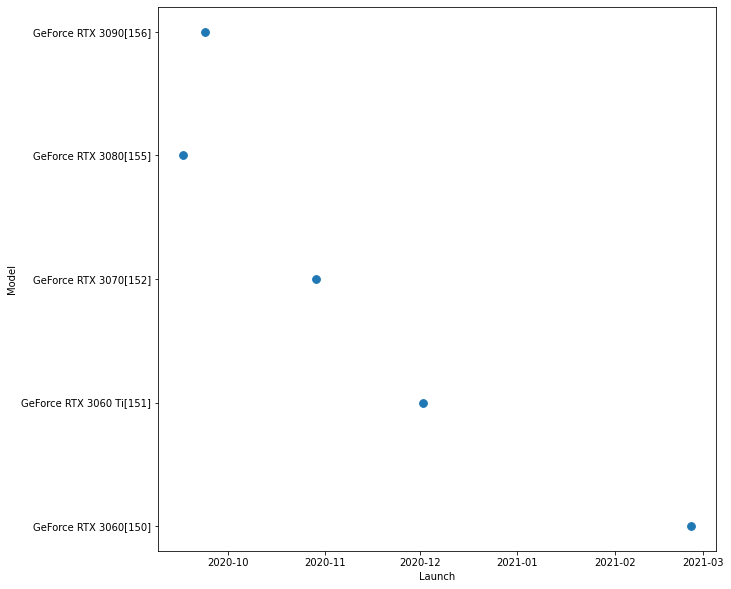

In [ ]:
df.plot.scatter(x="Launch", y="Model",s=60, figsize=(10,10))

In [ ]:
html="""
      <table class="wikitable" style="font-size: 80%; text-align: center;">
<tbody><tr>
<th rowspan="2">Model
</th>
<th rowspan="2">Launch
</th>
<th rowspan="2"><a href="/wiki/Code_name" title="Code name">Code name</a>
</th>
<th rowspan="2">Process
</th>
<th rowspan="2">Transistors (billion)
</th>
<th rowspan="2">Die size (mm<sup>2</sup>)
</th>
<th rowspan="2">Core config<sup id="cite_ref-CoreConfig_115-0" class="reference"><a href="#cite_note-CoreConfig-115">[b]</a></sup>
</th>
<th rowspan="2"><a href="/wiki/Computer_bus" class="mw-redirect" title="Computer bus">Bus</a> <a href="/wiki/I/O_interface" class="mw-redirect" title="I/O interface">interface</a>
</th>
<th rowspan="2"><a href="/wiki/GPU_cache" class="mw-redirect" title="GPU cache">L2</a>
<p><a href="/wiki/GPU_cache" class="mw-redirect" title="GPU cache">Cache</a> (<a href="/wiki/Megabyte" title="Megabyte">MB</a>)
</p>
</th>
<th colspan="3">Clock speeds
</th>
<th colspan="4">Memory
</th>
<th colspan="2"><a href="/wiki/Fillrate" title="Fillrate">Fillrate</a><sup id="cite_ref-PerfValues_116-0" class="reference"><a href="#cite_note-PerfValues-116">[c]</a></sup>
</th>
<th colspan="3">Processing power (<a href="/wiki/GFLOPS" class="mw-redirect" title="GFLOPS">GFLOPS</a>)<sup id="cite_ref-PerfValues_116-1" class="reference"><a href="#cite_note-PerfValues-116">[c]</a></sup><sup id="cite_ref-ProcessingPower_117-0" class="reference"><a href="#cite_note-ProcessingPower-117">[d]</a></sup>
</th>
<th rowspan="2"><a href="/wiki/Thermal_design_power" title="Thermal design power">TDP</a> (Watts)
</th>
<th rowspan="2"><a href="/wiki/Scalable_Link_Interface" title="Scalable Link Interface">SLI</a> support
</th>
<th colspan="2">Release price (USD)
</th></tr>
<tr>
<th>Base core clock (<a href="/wiki/Hertz" title="Hertz">MHz</a>)
</th>
<th>Boost core clock (<a href="/wiki/Hertz" title="Hertz">MHz</a>)
</th>
<th>Memory (<a href="/wiki/Transfer_(computing)" title="Transfer (computing)">MT/s</a>)
</th>
<th>Size (<a href="/wiki/Gibibyte" class="mw-redirect" title="Gibibyte">GiB</a>)
</th>
<th>Bandwidth (<a href="/wiki/Gigabyte" title="Gigabyte">GB</a>/s)
</th>
<th>Bus type
</th>
<th>Bus width (<a href="/wiki/Bit" title="Bit">bit</a>)
</th>
<th>Pixel (<a href="/wiki/Pixel" title="Pixel">GP</a>/s)<sup id="cite_ref-PixelFillrate_118-0" class="reference"><a href="#cite_note-PixelFillrate-118">[e]</a></sup><sup id="cite_ref-121" class="reference"><a href="#cite_note-121">[f]</a></sup>
</th>
<th>Texture (<a href="/wiki/Texel_(graphics)" title="Texel (graphics)">GT</a>/s)<sup id="cite_ref-TextureFillrate_122-0" class="reference"><a href="#cite_note-TextureFillrate-122">[g]</a></sup>
</th>
<th><a href="/wiki/Single_precision_floating-point_format" class="mw-redirect" title="Single precision floating-point format">Single precision</a>
</th>
<th><a href="/wiki/Double_precision_floating-point_format" class="mw-redirect" title="Double precision floating-point format">Double precision</a>
</th>
<th><a href="/wiki/Half_precision_floating-point_format" class="mw-redirect" title="Half precision floating-point format">Half precision</a>
</th>
<th>MSRP
</th>
<th>Founders Edition
</th></tr>
<tr>
<th>GeForce GT 1010<sup id="cite_ref-123" class="reference"><a href="#cite_note-123">[108]</a></sup>
</th>
<td>January 13, 2021
</td>
<td>GP108
</td>
<td rowspan="6"><a href="/wiki/Samsung_Electronics" title="Samsung Electronics">Samsung</a><br><a href="/wiki/14_nanometer" class="mw-redirect" title="14 nanometer">14LPP</a>
</td>
<td rowspan="3">1.8
</td>
<td rowspan="3">74
</td>
<td>256:16:16
</td>
<td>PCIe 3.0 x16
</td>
<td>0.25
</td>
<td>1228
</td>
<td>1468
</td>
<td>?
</td>
<td rowspan="4">2
</td>
<td>40.1
</td>
<td>GDDR5
</td>
<td rowspan="3">64
</td>
<td>23.5
</td>
<td>23.5
</td>
<td>?
</td>
<td>?
</td>
<td>?
</td>
<td>30
</td>
<td>No
</td>
<td>Unknown
</td>
<td>N/A
</td></tr>
<tr>
<th rowspan="2" style="text-align:left;">GeForce GT 1030<sup id="cite_ref-gt1030_124-0" class="reference"><a href="#cite_note-gt1030-124">[109]</a></sup><sup id="cite_ref-gt1030ddr4_125-0" class="reference"><a href="#cite_note-gt1030ddr4-125">[110]</a></sup>
</th>
<td>March 12, 2018
</td>
<td>GP108-310-A1
</td>
<td rowspan="2">384:24:16 (3) (1)
</td>
<td rowspan="2">PCIe 3.0 x4<sup id="cite_ref-126" class="reference"><a href="#cite_note-126">[111]</a></sup><sup id="cite_ref-127" class="reference"><a href="#cite_note-127">[112]</a></sup>
</td>
<td>?
</td>
<td>1152
</td>
<td>1379
</td>
<td>2100
</td>
<td>16.8
</td>
<td><a href="/wiki/DDR4" class="mw-redirect" title="DDR4">DDR4</a>
</td>
<td>18.4<br>22.0
</td>
<td>27.6<br>33.0
</td>
<td>884.7<br>1 059.0
</td>
<td>27.6<br>33.0
</td>
<td>13.8<br>16.5
</td>
<td>20
</td>
<td rowspan="12" style="background:#F99;vertical-align:middle;text-align:center;" class="table-no">No
</td>
<td>$79
</td>
<td rowspan="10" data-sort-value="" style="background: #ececec; color: #2C2C2C; vertical-align: middle; text-align: center;" class="table-na">N/A
</td></tr>
<tr>
<td>May 17, 2017
</td>
<td>GP108-300-A1
</td>
<td>.5
</td>
<td>1227
</td>
<td>1468
</td>
<td>6000
</td>
<td>48.0
</td>
<td rowspan="8"><a href="/wiki/GDDR5" class="mw-redirect" title="GDDR5">GDDR5</a>
</td>
<td>19.6<br>23.4
</td>
<td>29.4<br>35.2
</td>
<td>942.3<br>1 127.4
</td>
<td>29.4<br>35.2
</td>
<td>14.7<br>17.6
</td>
<td>30
</td>
<td>$70
</td></tr>
<tr>
<th rowspan="2" style="text-align:left;">GeForce GTX 1050<sup id="cite_ref-Geforce_GTX_1050_Family_128-0" class="reference"><a href="#cite_note-Geforce_GTX_1050_Family-128">[113]</a></sup>
</th>
<td>October 25, 2016
</td>
<td>GP107-300-A1
</td>
<td rowspan="3">3.3
</td>
<td rowspan="3">132
</td>
<td>640:40:32 (5) (2)
</td>
<td rowspan="17">PCIe 3.0 x16
</td>
<td>1
</td>
<td>1354
</td>
<td>1455
</td>
<td rowspan="3">7000
</td>
<td>112.0
</td>
<td>128
</td>
<td>43.3<br>46.6
</td>
<td>54.1<br>58.8
</td>
<td>1 733.1<br>1 862.4
</td>
<td>54.1<br>58.2
</td>
<td>27.0<br>29.1
</td>
<td rowspan="3">75<br>(Retail<br>up to<br>120)
</td>
<td>$109
</td></tr>
<tr>
<td>May 21, 2018
</td>
<td>GP107-301-A1
</td>
<td>768:48:24 (6) (2)
</td>
<td>.75
</td>
<td>1392
</td>
<td>1518
</td>
<td>3
</td>
<td>84.0
</td>
<td>96
</td>
<td>33.4<br>36.4
</td>
<td>66.8<br>72.9
</td>
<td>2 138.1<br>2 331.6
</td>
<td>66.8<br>72.9
</td>
<td>33.4<br>36.4
</td>
<td style="background: #ececec; color: #2C2C2C; font-size: smaller; vertical-align: middle; text-align: center;" class="unknown table-unknown">Un­known
</td></tr>
<tr>
<th style="text-align:left;">GeForce GTX 1050&nbsp;Ti<sup id="cite_ref-Geforce_GTX_1050_Family_128-1" class="reference"><a href="#cite_note-Geforce_GTX_1050_Family-128">[113]</a></sup>
</th>
<td>October 25, 2016
</td>
<td>GP107-400-A1
</td>
<td>768:48:32 (6) (2)
</td>
<td>1
</td>
<td>1290
</td>
<td>1392
</td>
<td>4
</td>
<td>112.0
</td>
<td>128
</td>
<td>41.2<br>44.5
</td>
<td>61.9<br>66.8
</td>
<td>1 981.4<br>2 138.1
</td>
<td>61.9<br>66.8
</td>
<td>30.9<br>33.4
</td>
<td>$139
</td></tr>
<tr>
<th rowspan="7" style="text-align:left;">GeForce GTX 1060<br><sup id="cite_ref-Geforce_GTX_1060_129-0" class="reference"><a href="#cite_note-Geforce_GTX_1060-129">[114]</a></sup><sup id="cite_ref-130" class="reference"><a href="#cite_note-130">[115]</a></sup><sup id="cite_ref-131" class="reference"><a href="#cite_note-131">[116]</a></sup><sup id="cite_ref-132" class="reference"><a href="#cite_note-132">[117]</a></sup>
</th>
<td>December 25, 2016
</td>
<td>GP104-140-A1
</td>
<td rowspan="14"><a href="/wiki/TSMC" title="TSMC">TSMC</a><br><a href="/wiki/16_nanometer" class="mw-redirect" title="16 nanometer">16FF</a>
</td>
<td>7.2
</td>
<td>314
</td>
<td rowspan="2">1152:72:48 (9) (2)
</td>
<td>1.5?
</td>
<td rowspan="8">1506
</td>
<td rowspan="7">1708
</td>
<td rowspan="6">8000
</td>
<td rowspan="2">3
</td>
<td rowspan="2">192.0
</td>
<td rowspan="2">192
</td>
<td rowspan="2">72.2<br>81.9
</td>
<td rowspan="2">108.4<br>122.9
</td>
<td rowspan="2">3 469.8<br>3 935.2
</td>
<td rowspan="2">108.4<br>122.9
</td>
<td rowspan="2">54.2<br>61.4
</td>
<td rowspan="7">120<br>(Retail<br>up to<br>200)
</td>
<td rowspan="2">$199
</td></tr>
<tr>
<td>August 18, 2016
</td>
<td>GP106-300-A1
</td>
<td rowspan="2">4.4
</td>
<td rowspan="2">200
</td>
<td>1.5
</td></tr>
<tr>
<td>December 26, 2017
</td>
<td>GP106-350-K3-A1
</td>
<td>1280:80:40 (10) (2)
</td>
<td>1.25
</td>
<td>5
</td>
<td>160.0
</td>
<td>160
</td>
<td>60.2<br>68.3
</td>
<td rowspan="5">120.4<br>136.7
</td>
<td rowspan="5">3 855.3<br>4 375.0
</td>
<td rowspan="5">120.4<br>136.7
</td>
<td rowspan="5">60.2<br>68.3
</td>
<td style="background: #FFD; color: black; vertical-align: middle; text-align: center;" class="partial table-partial">OEM
</td></tr>
<tr>
<td>March 8, 2018
</td>
<td>GP104-150-A1
</td>
<td rowspan="2">7.2
</td>
<td rowspan="2">314
</td>
<td rowspan="4">1280:80:48 (10) (2)
</td>
<td rowspan="2">1.5
</td>
<td rowspan="4">6
</td>
<td rowspan="3">192.0
</td>
<td rowspan="4">192
</td>
<td rowspan="4">72.2<br>82.0
</td>
<td rowspan="2" style="background: #ececec; color: #2C2C2C; font-size: smaller; vertical-align: middle; text-align: center;" class="unknown table-unknown">Un­known
</td></tr>
<tr>
<td>December, 2018
</td>
<td>GP104-150-KA-A1
</td>
<td><a href="/wiki/GDDR5X" class="mw-redirect" title="GDDR5X">GDDR5X</a>
</td></tr>
<tr>
<td>July 19, 2016
</td>
<td>GP106-400-A1
</td>
<td rowspan="2">4.4
</td>
<td rowspan="2">200
</td>
<td rowspan="2">1.5?
</td>
<td rowspan="2"><a href="/wiki/GDDR5" class="mw-redirect" title="GDDR5">GDDR5</a>
</td>
<td>$249
</td>
<td>$299
</td></tr>
<tr>
<td>April 20, 2017
</td>
<td>GP106-410-A1
</td>
<td>9000
</td>
<td>216.0
</td>
<td>$299
</td>
<td data-sort-value="" style="background: #ececec; color: #2C2C2C; vertical-align: middle; text-align: center;" class="table-na">N/A
</td></tr>
<tr>
<th style="text-align:left;">GeForce GTX 1070<sup id="cite_ref-GeForce_GTX_1070_133-0" class="reference"><a href="#cite_note-GeForce_GTX_1070-133">[118]</a></sup><sup id="cite_ref-134" class="reference"><a href="#cite_note-134">[119]</a></sup>
</th>
<td>June 10, 2016 /<br>Dec. 2018
</td>
<td>GP104-200-A1
</td>
<td rowspan="4">7.2
</td>
<td rowspan="4">314
</td>
<td>1920:120:64 (15) (3)
</td>
<td rowspan="4">2
</td>
<td rowspan="2">1683
</td>
<td rowspan="2">8000
</td>
<td rowspan="4">8
</td>
<td rowspan="2">256.0
</td>
<td><a href="/wiki/GDDR5" class="mw-redirect" title="GDDR5">GDDR5</a> / <a href="/wiki/GDDR5X" class="mw-redirect" title="GDDR5X">GDDR5X</a>
</td>
<td rowspan="4">256
</td>
<td>96.3<br>107.7
</td>
<td>180.7<br>201.9
</td>
<td>5 783.0<br>6 462.7
</td>
<td>180.7<br>201.9
</td>
<td>90.3<br>100.9
</td>
<td>150<br>(Retail<br>up to<br>250)
</td>
<td rowspan="7">4-way SLI or 2-way <a href="/wiki/Scalable_Link_Interface#SLI_HB" title="Scalable Link Interface">SLI HB</a><sup id="cite_ref-135" class="reference"><a href="#cite_note-135">[120]</a></sup><sup id="cite_ref-136" class="reference"><a href="#cite_note-136">[121]</a></sup>
</td>
<td>$379
</td>
<td>$449 ($399)<sup id="cite_ref-:0_137-0" class="reference"><a href="#cite_note-:0-137">[122]</a></sup>
</td></tr>
<tr>
<th style="text-align:left;">GeForce GTX 1070&nbsp;Ti<sup id="cite_ref-GeForce_GTX_1070_133-1" class="reference"><a href="#cite_note-GeForce_GTX_1070-133">[118]</a></sup>
</th>
<td>November 2, 2017
</td>
<td>GP104-300-A1
</td>
<td>2432:152:64 (19) (4)
</td>
<td rowspan="3">1607
</td>
<td><a href="/wiki/GDDR5" class="mw-redirect" title="GDDR5">GDDR5</a>
</td>
<td>102.8<br>107.7
</td>
<td>244<br>256
</td>
<td>7 816.4<br>8 186.1
</td>
<td>244.2<br>255.8
</td>
<td>122.1<br>127.9
</td>
<td rowspan="3">180<br>(Retail<br>up to<br>300)
</td>
<td colspan="2">$449
</td></tr>
<tr>
<th rowspan="2" style="text-align:left;">GeForce GTX 1080<sup id="cite_ref-GeForce_GTX_1080_138-0" class="reference"><a href="#cite_note-GeForce_GTX_1080-138">[123]</a></sup>
</th>
<td>May 27, 2016
</td>
<td>GP104-400-A1
</td>
<td rowspan="2">2560:160:64 (20) (4)
</td>
<td rowspan="2">1733
</td>
<td>10000
</td>
<td>320.0
</td>
<td rowspan="5"><a href="/wiki/GDDR5X" class="mw-redirect" title="GDDR5X">GDDR5X</a>
</td>
<td rowspan="2">102.8<br>110.9
</td>
<td rowspan="2">257.1<br>277.2
</td>
<td rowspan="2">8 227.8<br>8 872.9
</td>
<td rowspan="2">257.1<br>277.2
</td>
<td rowspan="2">128.5<br>138.6
</td>
<td rowspan="2">$599 ($499)<sup id="cite_ref-:0_137-1" class="reference"><a href="#cite_note-:0-137">[122]</a></sup>
</td>
<td rowspan="2">$699 ($549)<sup id="cite_ref-:0_137-2" class="reference"><a href="#cite_note-:0-137">[122]</a></sup>
</td></tr>
<tr>
<td>April 20, 2017
</td>
<td>GP104-410-A1
</td>
<td rowspan="2">11000
</td>
<td>352.0
</td></tr>
<tr>
<th style="text-align:left;">GeForce GTX 1080&nbsp;Ti<sup id="cite_ref-GeForce_GTX_1080_Ti_139-0" class="reference"><a href="#cite_note-GeForce_GTX_1080_Ti-139">[124]</a></sup>
</th>
<td>March 5, 2017
</td>
<td>GP102-350-K1-A1
</td>
<td rowspan="3">12
</td>
<td rowspan="3">471
</td>
<td>3584:224:88 (28) (6)
</td>
<td>2.75
</td>
<td>1480
</td>
<td>1582
</td>
<td>11
</td>
<td>484.0
</td>
<td>352
</td>
<td>130.2<br>139.2
</td>
<td>331.5<br>354.3
</td>
<td>10 608.6<br>11 339.7
</td>
<td>331.5<br>354.3
</td>
<td>165.7<br>177.1
</td>
<td rowspan="3">250
</td>
<td colspan="2">$699
</td></tr>
<tr>
<th style="text-align:left;">Nvidia TITAN X<sup id="cite_ref-Nvidia_TITAN_X_140-0" class="reference"><a href="#cite_note-Nvidia_TITAN_X-140">[125]</a></sup>
</th>
<td>August 2, 2016
</td>
<td>GP102-400-A1
</td>
<td>3584:224:96 (28) (6)
</td>
<td rowspan="2">3
</td>
<td>1417
</td>
<td>1531
</td>
<td>10000
</td>
<td rowspan="2">12
</td>
<td>480.0
</td>
<td rowspan="2">384
</td>
<td>136.0<br>146.9
</td>
<td>317.4<br>342.9
</td>
<td>10 157.0<br>10 974.2
</td>
<td>317.4<br>342.9
</td>
<td>158.7<br>171.4
</td>
<td rowspan="2">$1200
</td>
<td rowspan="2" data-sort-value="" style="background: #ececec; color: #2C2C2C; vertical-align: middle; text-align: center;" class="table-na">N/A
</td></tr>
<tr>
<th style="text-align:left;">Nvidia TITAN Xp<sup id="cite_ref-Nvidia_TITAN_Xp_141-0" class="reference"><a href="#cite_note-Nvidia_TITAN_Xp-141">[126]</a></sup>
</th>
<td>April 6, 2017
</td>
<td>GP102-450-A1
</td>
<td>3840:240:96 (30) (6)
</td>
<td>1405
</td>
<td>1480
</td>
<td>11400
</td>
<td>547.7
</td>
<td>134.8<br>142.0
</td>
<td>337.2<br>355.2
</td>
<td>10 790.4<br>11 366.4
</td>
<td>337.2<br>355.2
</td>
<td>168.6<br>177.6
</td></tr></tbody></table>
"""

In [ ]:
tables =pandas.read_html(html)


In [ ]:
tables[0]

Model  ... Release price (USD)
                                   Model  ...    Founders Edition
0                   GeForce GT 1010[108]  ...                 NaN
1              GeForce GT 1030[109][110]  ...                 NaN
2              GeForce GT 1030[109][110]  ...                 NaN
3                  GeForce GTX 1050[113]  ...                 NaN
4                  GeForce GTX 1050[113]  ...                 NaN
5               GeForce GTX 1050 Ti[113]  ...                 NaN
6   GeForce GTX 1060[114][115][116][117]  ...                 NaN
7   GeForce GTX 1060[114][115][116][117]  ...                 NaN
8   GeForce GTX 1060[114][115][116][117]  ...                 NaN
9   GeForce GTX 1060[114][115][116][117]  ...                 NaN
10  GeForce GTX 1060[114][115][116][117]  ...                 NaN
11  GeForce GTX 1060[114][115][116][117]  ...                $299
12  GeForce GTX 1060[114][115][116][117]  ...                 NaN
13            GeForce GTX 1070[118][119]  ...    $449 ($399)[122]
14              GeForce GTX 1070 Ti[118]  ...                $449
15                 GeForce GTX 1080[123]  ...    $699 ($549)[122]
16                 GeForce GTX 1080[123]  ...    $699 ($549)[122]
17              GeForce GTX 1080 Ti[124]  ...                $699
18                   Nvidia TITAN X[125]  ...                 NaN
19                  Nvidia TITAN Xp[126]  ...                 NaN

[20 rows x 25 columns]